<a href="https://colab.research.google.com/github/stevejj4/Data-Cleaning/blob/main/House_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import auth #Authorizing google colab
auth.authenticate_user()
import gspread #credentials for google sheet
from google.auth import default
creds,_ = default()
gc = gspread.authorize(creds) #Authorizing the connection
import pandas as pd
worksheet = gc.open('House_Prices').sheet1 #defining the worksheet
rows = worksheet.get_all_values() #getting all values in list of row
df = pd.DataFrame(rows)
df.columns = df.iloc[0] #creating columns name
df = df.iloc[1:]

In [ ]:
#df.head()

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [11]:
#df.describe()

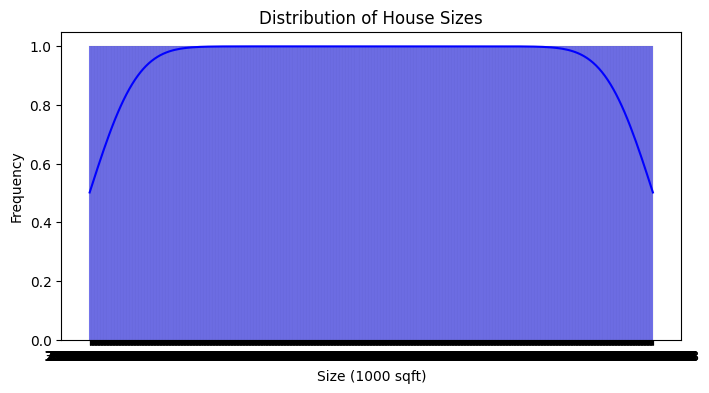

In [15]:
#Data Visualization
#Histogram for house sizes

plt.figure(figsize=(8,4))
sns.histplot(df['Size (1000 sqft)'] , bins = 30, kde = True, color = 'blue') # Changed 'colour' to 'color'
plt.title('Distribution of House Sizes')
plt.xlabel('Size (1000 sqft)')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Distribution of House Prices')

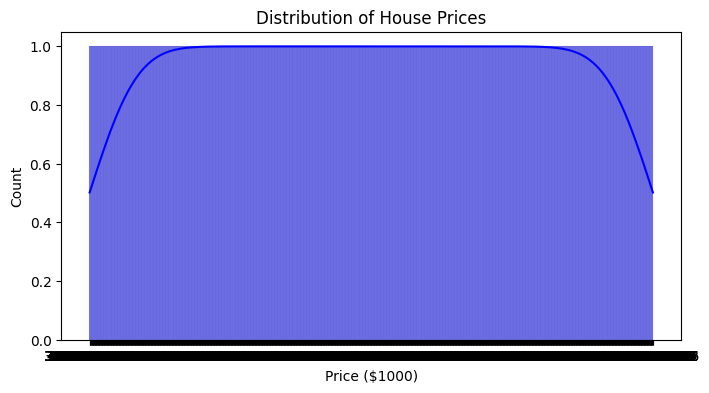

In [16]:
# Histogram for house  prices
plt.figure(figsize=(8,4))
sns.histplot(df['Price ($1000)'] , bins = 30, kde = True, color = 'blue') # Changed 'colour' to 'color'
plt.title('Distribution of House Prices')

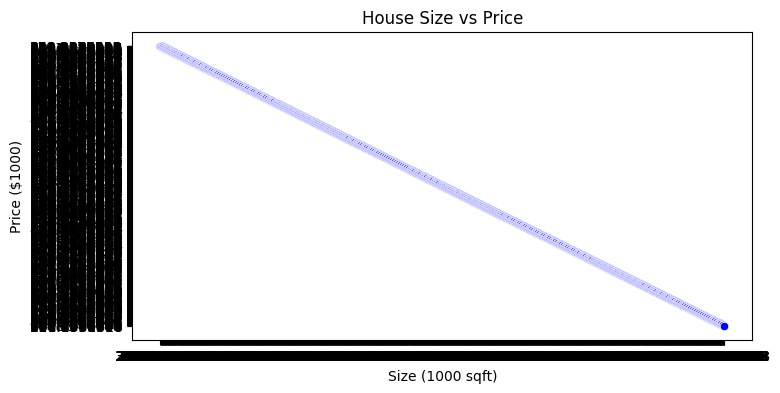

In [18]:
#Scatter plot for house sizes vs . prices
plt.figure(figsize=(8,4)) # Changed '==' to '='
sns.scatterplot(x=df['Size (1000 sqft)'], y=df['Price ($1000)'], color = 'blue')
plt.title('House Size vs Price')
plt.xlabel('Size (1000 sqft)')
plt.ylabel('Price ($1000)')
plt.show()

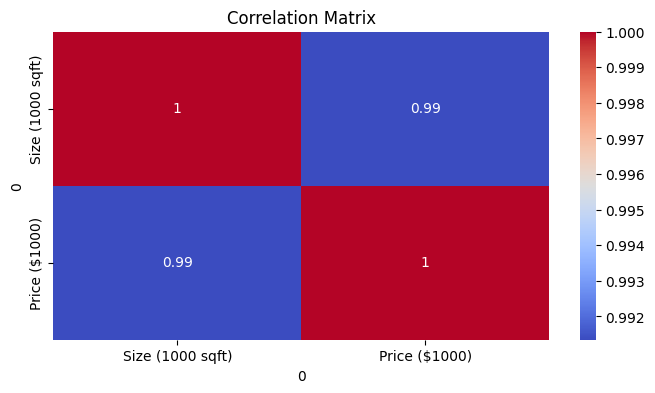

In [19]:
# correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(8,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()